## Data Information

Data have 5 columns and more than 100 million rows. There are about 1 million users whoes user behaviors including click, purchase, adding item to shopping cart and item favoring during November 25 to December 03, 2017. Each line represents a specific user-item interaction, which consists of user ID, item ID, item's category ID, behavior type and timestamp, separated by commas.

In [ ]:
# Modules imported
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
data = pd.read_csv('/Users/paxton615/Downloads/UserBehavior.csv')

In [ ]:
data.shape

In [ ]:
data.isnull().sum()

In [ ]:
data.nunique() # take 2-3 minutes to complete, be cautious to run this line

In [ ]:
data.head()

In [ ]:
# col names = ['user_id', 'item_id','category_id','status',"timestamp"]
# pv: page view, buy: buy, cart: cart:, fav:favorite
data.columns = ['user_id', 'item_id','category_id','status',"timestamp"]

Trying some concert code here：

fun = data.head()
fun

str(pd.Timestamp(fun['timestamp'][0], unit='s'))[:10] 

convert str to timestamp
str(pd.Timestamp('2017-11-11').year)+'-'+str(pd.Timestamp('2017-11-11').month)

pd.Timestamp(fun['timestamp'][0], unit='s').hour

pd.Timestamp(fun['timestamp'][0], unit='s').month

It worked!

In [ ]:
# select 3 million for analysis, calling them 'users'
users = data.iloc[5000000:8000000,:]

In [ ]:
users.shape

In [ ]:
users.reset_index(drop=True, inplace=True)

In [ ]:
users.head()

In [ ]:
users.nunique()

In [ ]:
# How much does ths sample, users, represent the population.
total_nuni = ['1 987994','2268318 4162024','2520377 9439','pv 4','1511544070 815859']

pop_unq = [int(i.split(' ')[1]) for i in total_nuni]
pop_unq

sample_unq = [i for i in users.nunique()]
sample_unq

perctage = []
for i,j in zip(sample_unq,pop_unq):
    perctage.append('{:2%}'.format(i/j))

# the subset, users, contains 3% of total users,
# 19% of total items, 73% of categories
perctage

In [ ]:
users['hour']=[pd.Timestamp(i, unit='s',tz='Asia/Shanghai').hour for i in users.timestamp]

users['year']=[pd.Timestamp(i, unit='s',tz='Asia/Shanghai').year for i in users.timestamp]

users['day']=[pd.Timestamp(i, unit='s',tz='Asia/Shanghai').day for i in users.timestamp]

users['month']=[pd.Timestamp(i, unit='s',tz='Asia/Shanghai').month for i in users.timestamp]
# 0 is Monday，6 is Sunday
users['dayofweek']=[pd.Timestamp(i, unit='s',tz='Asia/Shanghai').dayofweek for i in users.timestamp]

In [ ]:
users.year.unique() # data were generated during 2017-11-25 to 2017-12-3
# 2020,1919,2021 need to be found and cleaned later!

In [ ]:
users[(users['year']==1919)| (users['year']==2021)|(users['year']==2020)].count()

In [ ]:
users = users[users['year']==2017] # only choose 2017 data

In [ ]:
np.sort(users.hour.unique()) # hours seem normal

In [ ]:
users.day.unique() 
# keep the days within 11.25-12.3

In [ ]:
users = users[users['day'].isin([25,26,27,28,29,30,1,2,3])] 

In [ ]:
users.month.unique()
# data happened during 2017.11-2017.12, some months need to be cleaned

In [ ]:
users[(users['month']==10)| (users['month']==4)|(users['month']==9)|(users['month']==5)|(users['month']==8)].count()


In [ ]:
users = users[users['month'].isin([11,12])]

In [ ]:
users.shape

In [ ]:
users.head() 

In [ ]:
users.to_csv(r'/Users/paxton615/Github_Personal/Alibaba_UserBehavior_Analysis/drafts/users_3m.csv')

In [ ]:
# drop duplicstes: same user,same day, same hour, viewed the same item 
users = users.drop_duplicates(subset=['user_id','item_id','status','hour','day'])


In [ ]:
users.shape

In [ ]:
users.head()

In [ ]:
# Form user['date'] by using year, month, day
date = []
for i,j,k in zip(users['year'], users['month'], users['day']):
    date.append(str(i)+"-"+str(j)+"-"+str(k))

users['date']=pd.to_datetime(date)

users.head()

In [ ]:
# tidy cols and reset_index
users = users[['user_id', 'item_id' , 'category_id', 'status', 'date','dayofweek' ,'hour']]
users.reset_index(drop=True, inplace=True)

In [ ]:
users.dtypes
# Could convert hour to datetime as well, however, don't see the need yet
# pd.to_datetime(users['hour'], format='%H')

In [ ]:
users.head()

In [ ]:
users.to_csv(r'/Users/paxton615/Github_Personal/Alibaba_UserBehavior_Analysis/drafts/users_2m.csv')

# Saved , 2.7m entries.

In [1]:
# Modules imported
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
users = pd.read_csv('/Users/paxton615/Github_Personal/Alibaba_UserBehavior_Analysis/drafts/users_2m.csv')


In [3]:
users.head()

,Unnamed: 0,user_id,item_id,category_id,status,date,dayofweek,hour
0,0,309818,4710383,1792277,pv,2017-11-29,2,20
1,1,309818,1421743,4069500,pv,2017-11-29,2,20
2,2,309818,800137,1216617,pv,2017-11-29,2,20
3,3,309818,2493122,1216617,pv,2017-11-29,2,20
4,4,309818,1461532,3102419,pv,2017-11-30,3,7


In [4]:
users.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
users.head()

,user_id,item_id,category_id,status,date,dayofweek,hour
0,309818,4710383,1792277,pv,2017-11-29,2,20
1,309818,1421743,4069500,pv,2017-11-29,2,20
2,309818,800137,1216617,pv,2017-11-29,2,20
3,309818,2493122,1216617,pv,2017-11-29,2,20
4,309818,1461532,3102419,pv,2017-11-30,3,7


# 用户使用行为的漏斗模型

分析用户使用行为的漏斗模型，AARRR模型分析用户行为，此处数据主要涉及用户刺激和购买转化环节。
通过用户从浏览到最终购买过程的流失情况，包括浏览，收藏，加入购物车和购买。在本例中，各项指标如下:

In [6]:
# 访问用户总数 （UV）:29233
users.nunique()

user_id         29233
item_id        805830
category_id      6910
status              4
date                9
dayofweek           7
hour               24
dtype: int64

In [7]:
# 页面总访问量 （PV）：2406344
users.groupby('status')['user_id'].count()

status
buy       58537
cart     167988
fav       86553
pv      2435888
Name: user_id, dtype: int64

平均每人每周访问量

In [8]:
# Average PV per week per person
avg_pv = users.groupby('status')['user_id'].count().pv / users.user_id.nunique()
'{:.4}'.format(avg_pv)

'83.33'

In [9]:
# 每个用户的pv数量是多少？逻辑：相当于通过按user_id来groupby，统计大类（status）中某个小类（pv）的数量
# 很重要的groupby应用实例，filter之后再做groupby
# 很重要，很重要
user_pv = pd.DataFrame(users[users['status']=='pv'].groupby(users['user_id'],as_index=True)[['status']].count())
user_pv.columns=['pv']
user_pv.head()

,pv
user_id,
34,32
42,50
43,119
310,69
311,34


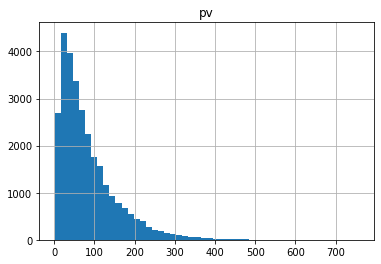

In [101]:
user_pv.hist(bins=50);

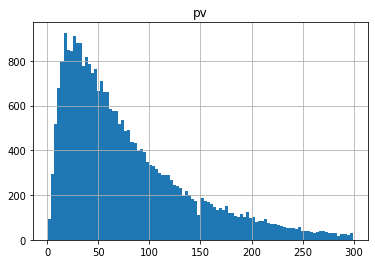

In [99]:
user_pv[user_pv['pv']<300].hist(bins=100);

In [100]:
len(user_pv[(user_pv['pv']<35)&(user_pv['pv']>15)])

5552

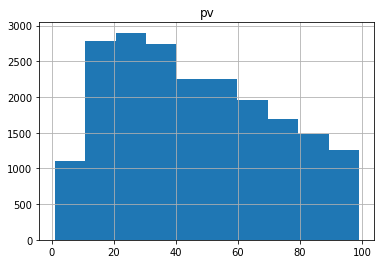

In [12]:
user_pv[user_pv['pv']<100].hist();

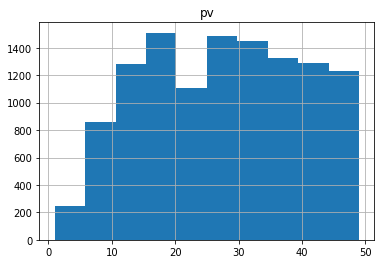

In [13]:
user_pv[user_pv['pv']<50].hist();

In [14]:
[32,34,24,20,6,23,49,43]

[32, 34, 24, 20, 6, 23, 49, 43]

In [15]:
len(list(user_pv.pv.values))

29116

pyechat的histogram缺少自动计算功能，需要手动输入最后数据。


from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker # 很有意思的一个功能
from IPython.display import IFrame
c = (
    Bar()
    .add_xaxis([0,10,20,30,40,50])
    .add_yaxis("商家A", [850,1500,1200,1300,1250], category_gap=0, color=Faker.rand_color())
    .set_global_opts(title_opts=opts.TitleOpts(title="Bar-直方图"))
    .render("bar_histogram.html")

)
IFrame(src='./bar_histogram.html', width=8000, height=800)

In [16]:
# 只有一次浏览记录的用户有多少？
# 可见，非常少，可以忽略不计。
len(user_pv[user_pv['pv'] == 1])

23

In [17]:
# 所有user的总浏览量
users[users['status']=='pv']['user_id'].count()

2435888

In [18]:
# 跳失率
Bounce_rate = len(user_pv[user_pv['pv'] == 1]) / users[users['status']=='pv']['user_id'].count()
'{:.6%}'.format(Bounce_rate)

'0.000944%'

漏斗模型：
喜欢和放入购物车都属于决策环节，二者合一。
百分之多少的人从pv进入了cart和fav环节
又有百分之多少的人从cart和fav环节进入了最后的buy

In [19]:
users_status = users.groupby('status').user_id.count()
users_status

status
buy       58537
cart     167988
fav       86553
pv      2435888
Name: user_id, dtype: int64

In [20]:
# 约10.46%的用户从浏览环节进入决策环节
pv_to_cartnfav = (users_status[1]+users_status[2])/users_status[3]
'{:.2%}'.format(pv_to_cartnfav)

'10.45%'

In [21]:
# 约23.06%的用户从决策环节进入了购买环节，环比之前大幅提升
cartnfav_to_buy = users_status[0]/(users_status[1]+users_status[2])
'{:.3%}'.format(cartnfav_to_buy)

'22.997%'

# 适合展示vote yes or no 之类的结果

from pyecharts import options as opts
from pyecharts.charts import Grid, Liquid
from pyecharts.commons.utils import JsCode
from IPython.display import IFrame

l1 = (
    Liquid()
    .add("lq", [0.23, 0.3], center=["60%", "50%"],)
    .set_global_opts(title_opts=opts.TitleOpts(title="Conversion_Rate:    pv_to_cartnfav=10.45%    cartnfav_to_buy=23%"))
)

l2 = Liquid().add(
    "lq",
    [0.1045, 0.15],
    center=["25%", "50%"],
    label_opts=opts.LabelOpts(
        font_size=35,
        formatter=JsCode(
            """function (param) {
                    return (Math.floor(param.value * 10000) / 100) + '%';
                }"""
        ),
        position="inside",
    ),
)

grid = Grid().add(l1, grid_opts=opts.GridOpts()).add(l2, grid_opts=opts.GridOpts())
grid.render("multiple_liquid.html")

IFrame(src='./multiple_liquid.html', width=700, height=600) # these codes worked

In [22]:
users.head()

,user_id,item_id,category_id,status,date,dayofweek,hour
0,309818,4710383,1792277,pv,2017-11-29,2,20
1,309818,1421743,4069500,pv,2017-11-29,2,20
2,309818,800137,1216617,pv,2017-11-29,2,20
3,309818,2493122,1216617,pv,2017-11-29,2,20
4,309818,1461532,3102419,pv,2017-11-30,3,7


In [23]:
print(len(users[users['status']=='pv']))

print(len(users[(users['status']=='cart') | (users['status']=='fav')]))

print(len(users[users['status']=='buy']))

2435888
254541
58537


In [24]:
from pyecharts import options as opts
from pyecharts.charts import Funnel
from pyecharts.faker import Faker
from IPython.display import IFrame

x_data = ["pv=2435888", "cart&fav=254541(10.45% of pv)", "buy=58537(23% of cart&fav)"]
y_data = [2435888, 254541, 58537]

data = [[x_data[i], y_data[i]] for i in range(len(x_data))]

(
    Funnel(init_opts=opts.InitOpts(width="800px", height="600px"))
    .add(
        series_name="",
        data_pair=data,
        gap=2,
#         tooltip_opts=opts.TooltipOpts(trigger="item", formatter="{a} <br/>{b} : {c}%"),
        label_opts=opts.LabelOpts(is_show=True, position="outside",color='black'),
        itemstyle_opts=opts.ItemStyleOpts(border_color="#fff", border_width=1),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="Conversion Rate", subtitle="Alibaba_users"))
    .render("funnel_chart.html")
)
IFrame(src='./funnel_chart.html', width=1000, height=600)

# 不同时间尺度下，用户行为模式分析

1.分析一周内的用户使用情况

In [25]:
users.date.unique()

array(['2017-11-29', '2017-11-30', '2017-12-01', '2017-12-02',
       '2017-12-03', '2017-11-27', '2017-11-28', '2017-11-25',
       '2017-11-26'], dtype=object)

In [26]:
# ub is user behavior
ub_daily_old=pd.DataFrame(users.groupby(['date','status'], as_index=False).user_id.count())
ub_daily_old.head()


,date,status,user_id
0,2017-11-25,buy,5868
1,2017-11-25,cart,17040
2,2017-11-25,fav,9163
3,2017-11-25,pv,258856
4,2017-11-26,buy,5995


In [27]:
# .pivot() 以...为中心旋转 很重要很重要很重要
ub_daily = ub_daily_old.pivot(index='date',columns='status')
ub_daily

user_id                      
status         buy   cart    fav      pv
date                                    
2017-11-25    5868  17040   9163  258856
2017-11-26    5995  18057   9245  260688
2017-11-27    6566  16564   8817  246517
2017-11-28    6055  16468   8639  242771
2017-11-29    6299  16771   8885  247401
2017-11-30    6458  17192   9177  251903
2017-12-01    6137  18759   9088  264524
2017-12-02    7707  23909  12058  334480
2017-12-03    7452  23228  11481  328748

In [28]:
# 好像可以对multi_colums的col name直接做修改
ub_daily.columns = ['buy', 'cart', 'fav', 'pv']
# 改名后调整cols的顺序
ub_daily = ub_daily[['pv','fav','cart','buy']]
ub_daily

,pv,fav,cart,buy
date,,,,
2017-11-25,258856,9163,17040,5868
2017-11-26,260688,9245,18057,5995
2017-11-27,246517,8817,16564,6566
2017-11-28,242771,8639,16468,6055
2017-11-29,247401,8885,16771,6299
2017-11-30,251903,9177,17192,6458
2017-12-01,264524,9088,18759,6137
2017-12-02,334480,12058,23909,7707
2017-12-03,328748,11481,23228,7452


小结论：
11-29为周三，11-25为周六，12-03为周日
周一到周五数据趋于稳定，周末数据有明显增加，运营活动可向周末时间倾斜

In [29]:
print(list(ub_daily.pv.values))

print(list(ub_daily.fav.values))

print(list(ub_daily.cart.values))

print(list(ub_daily.buy.values))

[258856, 260688, 246517, 242771, 247401, 251903, 264524, 334480, 328748]
[9163, 9245, 8817, 8639, 8885, 9177, 9088, 12058, 11481]
[17040, 18057, 16564, 16468, 16771, 17192, 18759, 23909, 23228]
[5868, 5995, 6566, 6055, 6299, 6458, 6137, 7707, 7452]


In [30]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker

c = (
    Bar(init_opts=opts.InitOpts(width="1000px", height="500px"))
    .add_xaxis(list(ub_daily.index))
    .add_yaxis("pv", [258856, 260688, 246517, 242771, 247401, 251903, 264524, 334480, 328748]) #tried using list(ub_daily.pv.values), doesn't work
    .add_yaxis("cart", [17040, 18057, 16564, 16468, 16771, 17192, 18759, 23909, 23228])
    .add_yaxis("fav",[9163, 9245, 8817, 8639, 8885, 9177, 9088, 12058, 11481])
    .add_yaxis("buy", [5868, 5995, 6566, 6055, 6299, 6458, 6137, 7707, 7452])
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Weekly : pv_cart_fav_buy"),
#         toolbox_opts=opts.ToolboxOpts(),
        legend_opts=opts.LegendOpts(is_show=False),
    )
    .render("bar_toolbox.html")
)
IFrame(src='./bar_toolbox.html', width=1200, height=600)

2. 分析用户一天内的使用情况

In [31]:
users.head()

,user_id,item_id,category_id,status,date,dayofweek,hour
0,309818,4710383,1792277,pv,2017-11-29,2,20
1,309818,1421743,4069500,pv,2017-11-29,2,20
2,309818,800137,1216617,pv,2017-11-29,2,20
3,309818,2493122,1216617,pv,2017-11-29,2,20
4,309818,1461532,3102419,pv,2017-11-30,3,7


In [32]:
nov_28 = users[users['date']=='2017-11-29'][['user_id','status','hour']]
nov_28.head()

,user_id,status,hour
0,309818,pv,20
1,309818,pv,20
2,309818,pv,20
3,309818,pv,20
74,309824,pv,9


In [33]:
# 设计一个function，将指定数据自动转换成某日的四种状态浏览记录
def daily_status(df,str_colname1,str_colname2,str_colname3):
    temp = df.groupby([str_colname3,str_colname2],as_index=False).count()
    daily_num = temp.pivot(index=str_colname3,columns=str_colname2)
    daily_num.columns=['buy', 'cart', 'fav', 'pv']
    daily_num = daily_num[['pv','fav','cart','buy']]
    return (daily_num)

In [34]:
# "2017-12-02" correct ; "2017-12-2" incorrect
dec_2=users[users['date']=='2017-12-02'][['user_id','status','hour']]
dec_2_pic = daily_status(dec_2,'user_id','status','hour')

In [35]:
nov_28=users[users['date']=='2017-11-28'][['user_id','status','hour']]
nov_28_pic = daily_status(nov_28,'user_id','status','hour')

In [36]:
nov_28_pic.head()

,pv,fav,cart,buy
hour,,,,
0,7303,313,528,154
1,3184,81,237,50
2,1893,68,123,27
3,1363,33,75,24
4,1110,22,67,14


In [102]:
dec_2_pic.head()

,pv,fav,cart,buy
hour,,,,
0,10501,336,736,188
1,5299,236,397,81
2,2930,102,212,52
3,1786,91,151,22
4,1734,61,129,28


小结论：从每天的数据情况来看，20-23是绝对使用高峰期，应该在此时间段内增加互动营销，以希望更大收益

#method1形式炫酷，可缩放，但是只显示了pv，需要同时显示4条线

from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker

c = (
    Bar(init_opts=opts.InitOpts(width="1000px", height="500px"))
    .add_xaxis(list(dec_2_pic.index))
    .add_yaxis("pv", list(dec_2_pic.pv), color=Faker.rand_color())
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Dec_2 : pv "),
        datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],
    )
    .render("bar_datazoom_both.html")
)
IFrame(src='./bar_datazoom_both.html', width=1200, height=600)

In [ ]:
# method2
def hourly_pic(listX,list1,list2,list3,list4,title_str):
    import pyecharts.options as opts
    from pyecharts.charts import Line
    from IPython.display import IFrame

    x_data = listX

# y_data = [10501, 5299, 2930, 1786, 1734, 2000, 4390, 8700, 11019, 13548, 15147, 15709, 14813, 16998, 16354, 17368, 17680, 15984, 16192, 21023, 25508, 28747, 27787, 23263]
    (
        Line(init_opts=opts.InitOpts(width="800px", height="600px"))
        .add_xaxis(xaxis_data=x_data)
        .add_yaxis(
            series_name="pv",
            stack="总量",
            y_axis=list1,
            label_opts=opts.LabelOpts(is_show=True),
        )
        .add_yaxis(
            series_name="fav",
#         stack="总量",
            y_axis=list2,
            label_opts=opts.LabelOpts(is_show=False),
        )
        .add_yaxis(
            series_name="cart",
#         stack="总量",
            y_axis=list3,
            label_opts=opts.LabelOpts(is_show=False),
        )
        .add_yaxis(
            series_name="buy",
#         stack="总量",
            y_axis=list4,
            label_opts=opts.LabelOpts(is_show=True),
        )

        .set_global_opts(
            title_opts=opts.TitleOpts(title=title_str),
            tooltip_opts=opts.TooltipOpts(trigger="axis"),
            yaxis_opts=opts.AxisOpts(
                type_="value",
                axistick_opts=opts.AxisTickOpts(is_show=True),
                splitline_opts=opts.SplitLineOpts(is_show=True),
            ),
            xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
        )
        .render("stacked_line_chart.html")
    )
    IFrame(src='./stacked_line_chart.html', width=1200, height=600)

In [37]:
# method3
def hourly_2pic(listX,list1,list2,list3,list4,title_str):
    from pyecharts import options as opts
    from pyecharts.charts import Bar, Grid, Line
    from pyecharts.faker import Faker
    from IPython.display import IFrame
    bar = (
        Bar(init_opts=opts.InitOpts(width="800px", height="600px"))
        .add_xaxis(listX)
        .add_yaxis('pv',list1)
        .set_global_opts(title_opts=opts.TitleOpts(title=title_str))
    )
    line = (
        Line(init_opts=opts.InitOpts(width="800px", height="600px"))
        .add_xaxis(listX)
        .add_yaxis("fav", list2)
        .add_yaxis("cart", list3)
        .add_yaxis("buy", list4)
        .set_global_opts(
            title_opts=opts.TitleOpts(title=title_str, pos_top="48%"),
            legend_opts=opts.LegendOpts(pos_top="48%"),
        )
    )

    grid = (
        Grid(init_opts=opts.InitOpts(width="800px", height="600px"))
        .add(bar, grid_opts=opts.GridOpts(pos_bottom="60%"))
        .add(line, grid_opts=opts.GridOpts(pos_top="60%"))
        .render("grid_vertical.html")
    )

In [38]:
# for some reason, can't use listX=dec_2.index , otherwise graph will malfunction.
listX=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
list1=[10501, 5299, 2930, 1786, 1734, 2000, 4390, 8700, 11019, 13548, 
                15147, 15709, 14813, 16998, 16354, 17368, 17680, 15984, 16192, 21023,
                25508, 28747, 27787, 23263]
list2=[336, 236, 102, 91, 61, 66, 153, 298, 432, 531, 620, 643, 583, 624,
                605, 562, 599, 649, 528, 726, 889, 912, 952, 860]
list3=[736, 397, 212, 151, 129, 119, 359, 628, 810, 1023, 1033, 1139, 1045,
                1155, 1127, 1210, 1218, 1110, 1142, 1417, 1758, 2151, 2033, 1807]
list4=[188, 81, 52, 22, 28, 24, 67, 147, 223, 338, 514, 452, 425, 508, 489,
                466, 475, 362, 394, 428, 535, 560, 539, 390]
title_str = 'Dec_2_Sat_hourly_stats'

In [39]:
# method2没有双图显示的效果好
#hourly_pic(listX,list1,list2,list3,list4,title_str)
#IFrame(src='./stacked_line_chart.html', width=1200, height=600)

In [40]:
hourly_2pic(listX,list1,list2,list3,list4,title_str)
IFrame(src='./grid_vertical.html', width=1200, height=600)

In [41]:
# nov_28 
listX=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
list1=[7303, 3184, 1893, 1363, 1110, 1628, 3959, 6107, 8336, 10186, 12133, 11263, 11953, 13477, 13468, 12931, 12584, 10891, 11635, 15710, 17302, 20658, 19902, 13795]
list2=[313, 81, 68, 33, 22, 60, 136, 253, 348, 373, 454, 462, 409, 522, 506, 388, 508, 443, 322, 584, 546, 588, 602, 618]
list3=[528, 237, 123, 75, 67, 102, 277, 385, 595, 708, 777, 773, 779, 852, 862, 918, 781, 773, 770, 998, 1205, 1434, 1469, 980]
list4=[154, 50, 27, 24, 14, 25, 58, 81, 198, 350, 373, 346, 411, 371, 359, 360, 372, 300, 265, 371, 425, 404, 426, 291]
title_str = 'Nov_28_Sat_hourly_stats'

In [42]:
hourly_2pic(listX,list1,list2,list3,list4,title_str)
IFrame(src='./grid_vertical.html', width=1200, height=600)

# 不同商品种类的用户行为

1. 统计浏览次数，购买次数，收藏次数，和加入购物车次数最多的商品

In [43]:
users.head()

,user_id,item_id,category_id,status,date,dayofweek,hour
0,309818,4710383,1792277,pv,2017-11-29,2,20
1,309818,1421743,4069500,pv,2017-11-29,2,20
2,309818,800137,1216617,pv,2017-11-29,2,20
3,309818,2493122,1216617,pv,2017-11-29,2,20
4,309818,1461532,3102419,pv,2017-11-30,3,7


In [44]:
# top 20 items been viewed
item_viewed = users[users['status']=='pv'][['item_id','user_id']].groupby('item_id').count().sort_values('user_id',ascending=False).head(20)
item_viewed.columns=['viewed']
item_viewed.reset_index(inplace=True)

In [45]:
# top 20 items been bought
item_bought = users[users['status']=='buy'][['item_id','user_id']].groupby('item_id').count().sort_values('user_id',ascending=False).head(20)
item_bought.columns = ['bought']
item_bought.reset_index(inplace=True)


In [46]:
# top20 items in fav
item_fav = users[users['status']=='fav'][['item_id','user_id']].groupby('item_id').count().sort_values('user_id',ascending=False).head(20)
item_fav.columns = ['fav']
item_fav.reset_index(inplace=True)

In [47]:
# top20 items in cart
item_cart = users[users['status']=='cart'][['item_id','user_id']].groupby('item_id').count().sort_values('user_id',ascending=False).head(20)
item_cart.columns=['cart']
item_cart.reset_index(inplace=True)

study the relation between most bought and viewed


In [48]:
buy_vs_viewed = pd.DataFrame({'buy':item_bought['item_id'],'viewed':item_viewed['item_id']})


In [49]:
buy_vs_viewed['matching'] = ['y' if i in buy_vs_viewed.viewed.values else "n" for i in buy_vs_viewed.buy ]


match = []
for i in buy_vs_viewed['buy']:
    if i in buy_vs_viewed['viewed'].values:
        match.append(i)
    else:
        match.append('n')


In [50]:
# 注意，注意，注意，buy_vs_viewed['viewed'] 与buy_vs_viewed['viewed'].values 结果上的区别，
# 它们前一个依然有index，后一个是纯values的list
buy_vs_viewed['viewed'].values

array([ 812879, 3845720, 2032668, 2331370,  138964, 2338453,   59883,
       4211339, 1535294,  987143, 1583704, 3031354, 4649427, 2279428,
       2453685, 2818406, 4443059, 3520504, 3371523,  640975])

In [51]:
# only 2 matching ones found
buy_vs_viewed[buy_vs_viewed['matching']=='y']['buy']


1     3031354
12    4443059
Name: buy, dtype: int64

In [52]:
buy_vs_cart = pd.DataFrame({'buy':item_bought['item_id'],'cart':item_cart['item_id']})
buy_vs_cart['matching'] = ['y' if i in buy_vs_cart.cart.values else "n" for i in buy_vs_cart.buy ]


In [53]:
buy_vs_cart[buy_vs_cart['matching']=='y']['buy']


1     3031354
6     2560262
12    4443059
Name: buy, dtype: int64

In [54]:
buy_vs_fav = pd.DataFrame({'buy':item_bought['item_id'],'fav':item_fav['item_id']})
buy_vs_fav['matching'] = ['y' if i in buy_vs_fav.fav.values else "n" for i in buy_vs_fav.buy ]



In [55]:
buy_vs_fav[buy_vs_fav['matching']=='y']['buy']


1    3031354
Name: buy, dtype: int64

study the relation between most bought and viewed
结论：
貌似cart比view和fav对buy的影响更为直接

In [56]:
# 探寻v,c,f,b 四个status top 20的关系
v_c_f_b = item_viewed.merge(item_cart, on='item_id', how='left').merge(item_fav, on='item_id', how='left').merge(item_bought, on='item_id', how='left')
v_c_f_b

,item_id,viewed,cart,fav,bought
0,812879,822,44.0,24.0,NaN
1,3845720,640,27.0,22.0,NaN
2,2032668,595,NaN,23.0,NaN
3,2331370,562,36.0,30.0,NaN
4,138964,552,41.0,21.0,NaN
5,2338453,529,30.0,NaN,NaN
6,59883,513,NaN,NaN,NaN
7,4211339,491,NaN,NaN,NaN
8,1535294,487,36.0,21.0,NaN
9,987143,478,NaN,21.0,NaN


c_b_f_v = item_cart.merge(item_bought, on='item_id', how='left').merge(item_fav, on='item_id', how='left').merge(item_viewed, on='item_id', how='left')

In [57]:
# 以上四幅图需要一个能有效结合在一起的方式，没有比较，几幅图的意义不大。
# 最好是图形的。
# 思考：用merge的方式查看最终结果和过程间的区别

保留item_id作为图中最后一列的category，
viewed，按range从高到低，从大到小赋予数值，
cart非none部分copy viewed的数值
bought非none部分copy fav数值
将表格numpy化
将np图形化

In [58]:
# manually making dummies for making graph later
v_c_f_b['viewed_dummy']=np.arange(1,21,1)[::-1]

v_c_f_b['cart_dummy']=[j if np.isnan(i)==False else np.nan for i,j in zip(v_c_f_b['cart'],v_c_f_b['viewed_dummy'])]

v_c_f_b['fav_dummy']=[j if np.isnan(i)==False else np.nan for i,j in zip(v_c_f_b['fav'],v_c_f_b['cart_dummy'])]

v_c_f_b['bought_dummy']=[j if np.isnan(i)==False else np.nan for i,j in zip(v_c_f_b['bought'],v_c_f_b['viewed_dummy'])]

cart_dummy =[]
for i,j in zip(v_c_f_b['cart'],v_c_f_b['viewed_dummy']):
    if np.isnan(i) == False:
        cart_dummy.append(j)
    else:
        cart_dummy.append(np.nan)


cart_dummy

In [59]:
# for making graph, rearrange cols
v_c_f_b_pic = v_c_f_b[['item_id','viewed_dummy','cart_dummy', 'fav_dummy', 'bought_dummy']]

v_c_f_b_pic=v_c_f_b_pic[['bought_dummy','fav_dummy','cart_dummy','viewed_dummy','item_id']]

v_c_f_b_pic['item_id']=[str(i) for i in v_c_f_b_pic.item_id]


In [60]:
# pyechart doesn't read np.nan, need 'None'.
v_c_f_b_pic.replace(np.nan,'None',inplace=True)


In [61]:
list(v_c_f_b_pic.item_id)


['812879',
 '3845720',
 '2032668',
 '2331370',
 '138964',
 '2338453',
 '59883',
 '4211339',
 '1535294',
 '987143',
 '1583704',
 '3031354',
 '4649427',
 '2279428',
 '2453685',
 '2818406',
 '4443059',
 '3520504',
 '3371523',
 '640975']

In [62]:
v_c_f_b_pic.values


array([['None', 20.0, 20.0, 20, '812879'],
       ['None', 19.0, 19.0, 19, '3845720'],
       ['None', 'None', 'None', 18, '2032668'],
       ['None', 17.0, 17.0, 17, '2331370'],
       ['None', 16.0, 16.0, 16, '138964'],
       ['None', 'None', 15.0, 15, '2338453'],
       ['None', 'None', 'None', 14, '59883'],
       ['None', 'None', 'None', 13, '4211339'],
       ['None', 12.0, 12.0, 12, '1535294'],
       ['None', 'None', 'None', 11, '987143'],
       ['None', 10.0, 10.0, 10, '1583704'],
       [9.0, 9.0, 9.0, 9, '3031354'],
       ['None', 'None', 8.0, 8, '4649427'],
       ['None', 7.0, 7.0, 7, '2279428'],
       ['None', 6.0, 6.0, 6, '2453685'],
       ['None', 5.0, 5.0, 5, '2818406'],
       [4.0, 'None', 4.0, 4, '4443059'],
       ['None', 'None', 'None', 3, '3520504'],
       ['None', 'None', 'None', 2, '3371523'],
       ['None', 'None', 'None', 1, '640975']], dtype=object)

In [63]:
from pyecharts import options as opts
from pyecharts.charts import Parallel

data = [
    ['None', 20.0, 20.0, 20, '812879'],
       ['None', 19.0, 19.0, 19, '3845720'],
       ['None', 'None', 'None', 18, '2032668'],
       ['None', 17.0, 17.0, 17, '2331370'],
       ['None', 16.0, 16.0, 16, '138964'],
       ['None', 'None', 15.0, 15, '2338453'],
       ['None', 'None', 'None', 14, '59883'],
       ['None', 'None', 'None', 13, '4211339'],
       ['None', 12.0, 12.0, 12, '1535294'],
       ['None', 'None', 'None', 11, '987143'],
       ['None', 10.0, 10.0, 10, '1583704'],
       [9.0, 9.0, 9.0, 9, '3031354'],
       ['None', 'None', 8.0, 8, '4649427'],
       ['None', 7.0, 7.0, 7, '2279428'],
       ['None', 6.0, 6.0, 6, '2453685'],
       ['None', 5.0, 5.0, 5, '2818406'],
       [4.0, 'None', 4.0, 4, '4443059'],
       ['None', 'None', 'None', 3, '3520504'],
       ['None', 'None', 'None', 2, '3371523'],
       ['None', 'None', 'None', 1, '640975']
]
c = (
    Parallel(init_opts=opts.InitOpts(width="800px", height="500px"))
    .add_schema(
        [
            opts.ParallelAxisOpts(dim=0, name="bought",max_=20),
            opts.ParallelAxisOpts(dim=1, name="fav"),
            opts.ParallelAxisOpts(dim=2, name="cart"),
            opts.ParallelAxisOpts(dim=3, name="viewed"),
            opts.ParallelAxisOpts(
                dim=7,
                name="item_id",
                type_="category",
                data=['812879','3845720','2032668','2331370','138964','2338453',
 '59883','4211339','1535294','987143','1583704','3031354','4649427','2279428',
 '2453685','2818406','4443059','3520504','3371523','640975'][::-1]
            ),
        ]
    )
    .add("", data)
    .set_global_opts(title_opts=opts.TitleOpts(title="Top20_most_viewed_items : only two been bought"))
    .render("parallel_category.html")
)

IFrame(src='./parallel_category.html', width=1200, height=600)


2. 统计所有商品的购买次数

In [64]:
users.head()


,user_id,item_id,category_id,status,date,dayofweek,hour
0,309818,4710383,1792277,pv,2017-11-29,2,20
1,309818,1421743,4069500,pv,2017-11-29,2,20
2,309818,800137,1216617,pv,2017-11-29,2,20
3,309818,2493122,1216617,pv,2017-11-29,2,20
4,309818,1461532,3102419,pv,2017-11-30,3,7


In [65]:
# filter out 'buy' items and user_id
users[users['status']=='buy'][['item_id','user_id']].head()


,item_id,user_id
5,3648099,309818
69,3254921,309824
72,1245023,309824
73,2992622,309824
91,3883578,309824


In [66]:
# how many times each item been bought
item_buytimes = users[users['status']=='buy'][['item_id','user_id']].groupby('item_id', as_index=False).count().sort_values('user_id',ascending=False)
item_buytimes.columns=['item_id','bought_times']
item_buytimes.head(10)

,item_id,bought_times
27871,3122135,34
27044,3031354,25
45727,5140357,23
26402,2964774,23
16952,1910706,23
28470,3189426,20
22773,2560262,17
44955,5051027,16
45060,5062984,16
29019,3251377,16


In [67]:
# There are 38725 kinds of iterms that only been bought once
# only one item was repeatively bought 34 times
item_buytimes.groupby('bought_times').count()


,item_id
bought_times,
1,38725
2,4817
3,1262
4,501
5,237
6,126
7,97
8,50
9,37


In [69]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker

c = (
    Bar()
    .add_xaxis(['bought once','bought twice','three times','four times','five times',
               'six times','seven times','eight times','nine times','ten times'][::-1])
    .add_yaxis("", [38725, 4817, 1262, 501, 237, 126, 97, 50, 37, 18][::-1])
#     .add_yaxis("商家B", Faker.values())
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position="right"))
    .set_global_opts(title_opts=opts.TitleOpts(title="the frequency of eath item been bought"))
    .render("bar_reversal_axis.html")
)
IFrame(src='./bar_reversal_axis.html', width=1200, height=600)


In [70]:
item_buytimes_stas = pd.DataFrame(item_buytimes.groupby('bought_times').count())


In [72]:
'{:.2%}'.format(item_buytimes_stas.item_id[1]/sum(item_buytimes_stas.item_id))


'84.31%'

84.34%这个数据说明，大部分的销售来源于长尾商品的累积效应。而非爆款商品的带动。

# 基于RFM理论找出有价值的用户

In [73]:
users.head()


,user_id,item_id,category_id,status,date,dayofweek,hour
0,309818,4710383,1792277,pv,2017-11-29,2,20
1,309818,1421743,4069500,pv,2017-11-29,2,20
2,309818,800137,1216617,pv,2017-11-29,2,20
3,309818,2493122,1216617,pv,2017-11-29,2,20
4,309818,1461532,3102419,pv,2017-11-30,3,7


In [74]:
# 只看购买buy的记录；这里的 max， 指的是最大的，即最近的一次时间.  
# 注意，不是每个用户都进行了最后的buy
len(users[users['status']=='buy'].groupby('user_id',as_index=False)['date'].agg(['max']))


19865

In [75]:
# the most recent shopping record of each user
recent_buy = users[users['status']=='buy'].groupby('user_id',as_index=False)['date'].agg(['max'])

recent_buy.columns=['latest_shopping']
recent_buy.reset_index(inplace=True)

recent_buy.head()


,user_id,latest_shopping
0,43,2017-12-03
1,310,2017-12-01
2,311,2017-12-03
3,312,2017-12-03
4,318,2017-11-30


In [76]:
np.sort(recent_buy.latest_shopping.unique())


array(['2017-11-25', '2017-11-26', '2017-11-27', '2017-11-28',
       '2017-11-29', '2017-11-30', '2017-12-01', '2017-12-02',
       '2017-12-03'], dtype=object)

In [77]:
# 构建Rating标准,购物时间越近，评分越高

recent_buy['R'] = [0 if '2017-11-25'<= i <='2017-11-27' 
                   else 1 if '2017-11-28' <= i <= '2017-11-30' 
                   else 2 for i in recent_buy.latest_shopping]




In [78]:
recent_buy.head()


,user_id,latest_shopping,R
0,43,2017-12-03,2
1,310,2017-12-01,2
2,311,2017-12-03,2
3,312,2017-12-03,2
4,318,2017-11-30,1


In [79]:
# 有过购物记录的users，每人总共购买了多少商品
shopping_lots = users[users['status']=='buy'].groupby('user_id', as_index=False).item_id.count()

shopping_lots.head()


,user_id,item_id
0,43,6
1,310,1
2,311,9
3,312,8
4,318,2


In [80]:
np.sort(shopping_lots.item_id.unique())


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36,
       39, 40, 43, 45, 92])

In [81]:
# rate users based on their shopping lots
shopping_lots['F'] = [ 5 if i >= 50 
                     else 4 if 49 >= i >= 40
                     else 3 if 39 >= i >= 30
                     else 2 if 29 >= i >= 20
                     else 1 for i in shopping_lots.item_id]


In [82]:
shopping_lots.head()


,user_id,item_id,F
0,43,6,1
1,310,1,1
2,311,9,1
3,312,8,1
4,318,2,1


In [83]:
rmf = pd.merge(recent_buy, shopping_lots, on='user_id')[['user_id','latest_shopping','R','F']]


In [84]:
rmf.head()

,user_id,latest_shopping,R,F
0,43,2017-12-03,2,1
1,310,2017-12-01,2,1
2,311,2017-12-03,2,1
3,312,2017-12-03,2,1
4,318,2017-11-30,1,1


In [85]:
rmf['R+F'] = rmf['R']+rmf['F']

rmf.head()


,user_id,latest_shopping,R,F,R+F
0,43,2017-12-03,2,1,3
1,310,2017-12-01,2,1,3
2,311,2017-12-03,2,1,3
3,312,2017-12-03,2,1,3
4,318,2017-11-30,1,1,2


In [86]:
rmf['R+F'].value_counts(normalize=True)


3    0.578656
2    0.265039
1    0.154040
4    0.001712
5    0.000352
6    0.000151
7    0.000050
Name: R+F, dtype: float64

In [87]:
1.5/11.4


0.13157894736842105

In [88]:
7.2/22


0.32727272727272727

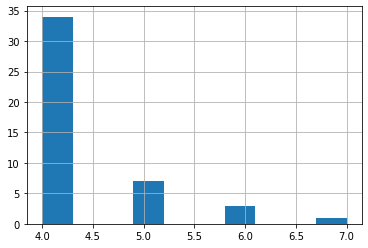

In [92]:
rmf[rmf['R+F']>3]['R+F'].hist();

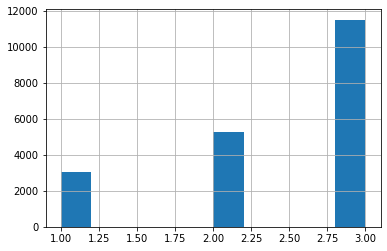

In [93]:
rmf[rmf['R+F']<4]['R+F'].hist();